In [3]:
%load_ext autoreload
%autoreload 2

import squidpy as sq
import txsim as tx
import skimage.io
import scipy.io
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import tifffile
from cellpose import models

my_dpi = _dpi = 72

/home/habib/anaconda3/envs/prototype/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


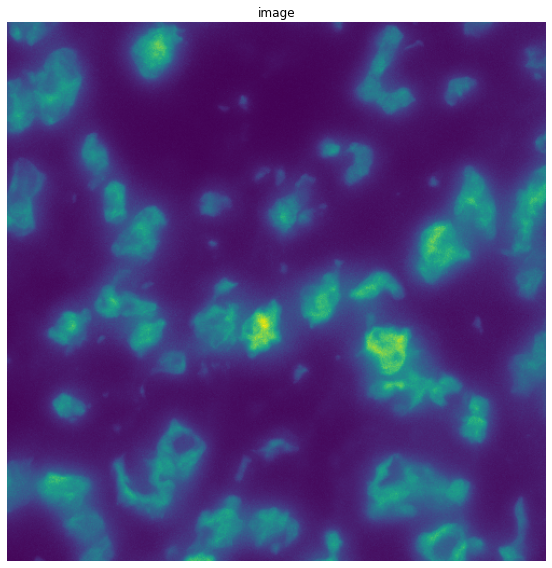

In [4]:
image_file = "/mnt/d/hmgu/data/heart/nuclei_PCW4.5_1.tif"
img = sq.im.ImageContainer(image_file)
img_crop = img.crop_corner(6500, 1500, size=500)
img_crop.show()

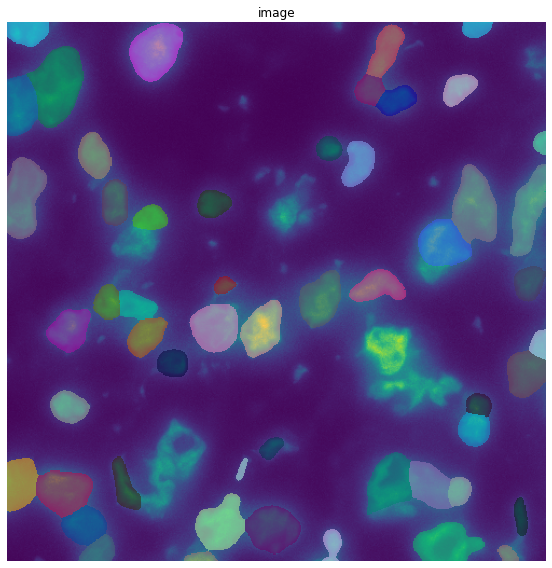

In [6]:
def cellpose(img, min_size = 15):
        model = models.Cellpose(model_type='nuclei')
        res, _, _, _ = model.eval(
            img,
            channels=[0, 0],
            diameter=None,
            min_size=min_size,
        )
        return res
tx.preprocessing.segment_nuclei(img_crop, layer = 'image', method=cellpose)
img_crop.show(layer="image",segmentation_layer="segmented_custom", segmentation_alpha = 0.5)

In [8]:
seg_arr = img_crop['segmented_custom'].to_numpy()[:,:,0,0]
seg_arr = skimage.segmentation.expand_labels(seg_arr, distance=15)
#skimage.io.imsave('test/segmented_image.tif', seg_arr)


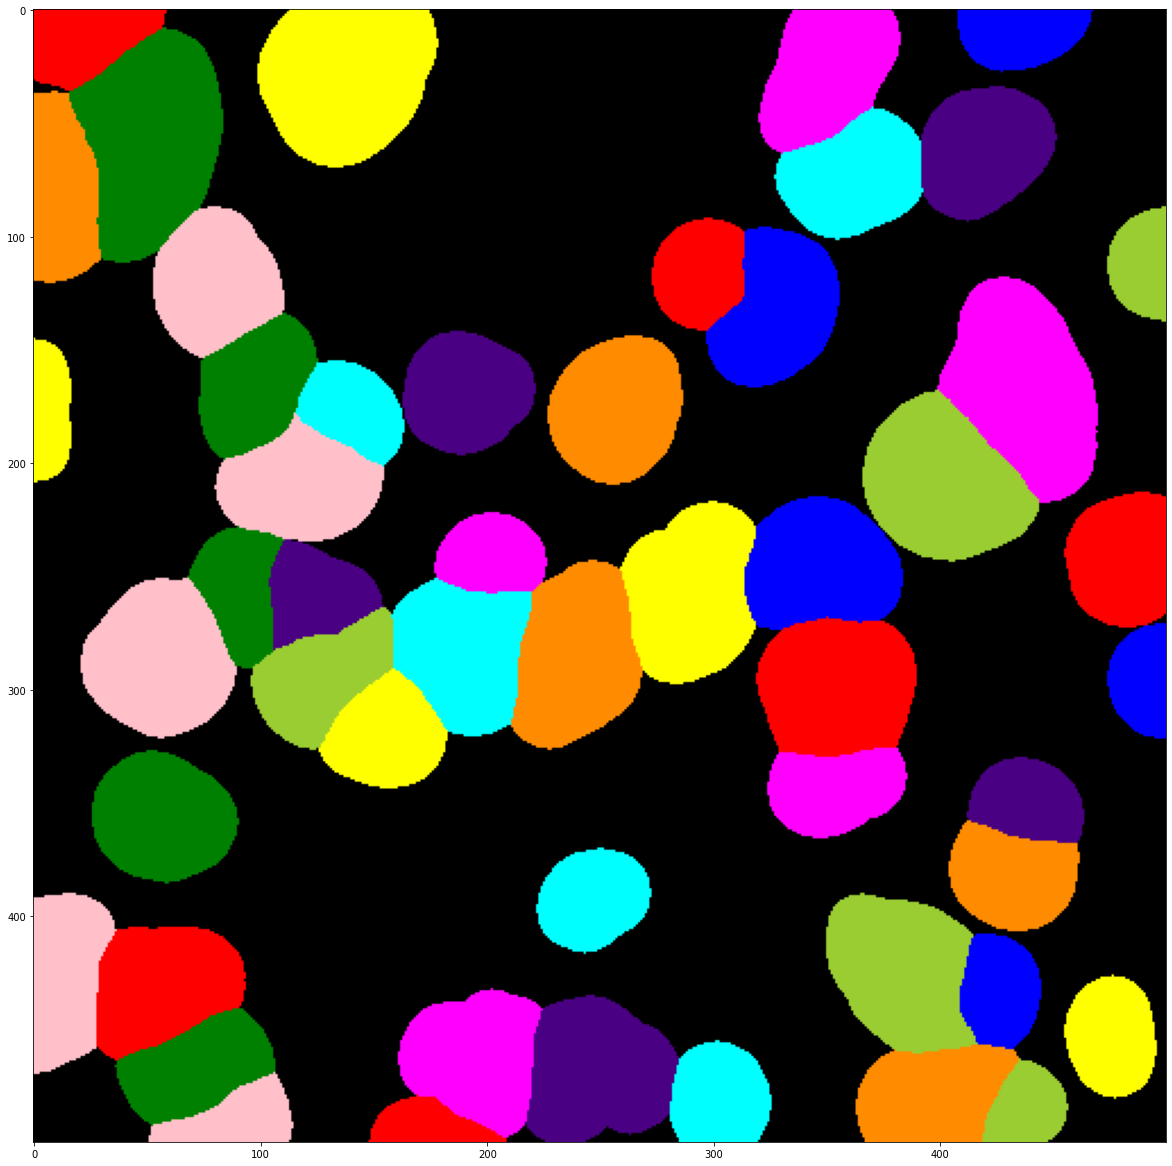

In [9]:
imgmat = skimage.io.imread("/mnt/d/hmgu/data/test/segmented_image.tif")
rgb_label_image = skimage.color.label2rgb(imgmat, bg_label=0)
plt.figure(figsize=(1500/_dpi, 1500/_dpi), dpi=_dpi)
imgplot = plt.imshow(rgb_label_image)
plt.show()

In [12]:

(unique, counts) = np.unique(imgmat, return_counts=True)
areas = np.asarray((unique, counts)).T

In [23]:
spots = pd.read_csv("/mnt/d/hmgu/data/test/spots.csv")
spots.columns = ['Gene', 'x', 'y', 'type']
spots = spots[['Gene', 'x', 'y']]
spots.head()

,Gene,x,y
0,MYL2,81.942,0.135
1,SORBS2,383.540,4.380
2,MYBPC3,19.395,5.256
3,TOP2A,192.754,4.870
4,MYOZ2,269.513,4.667


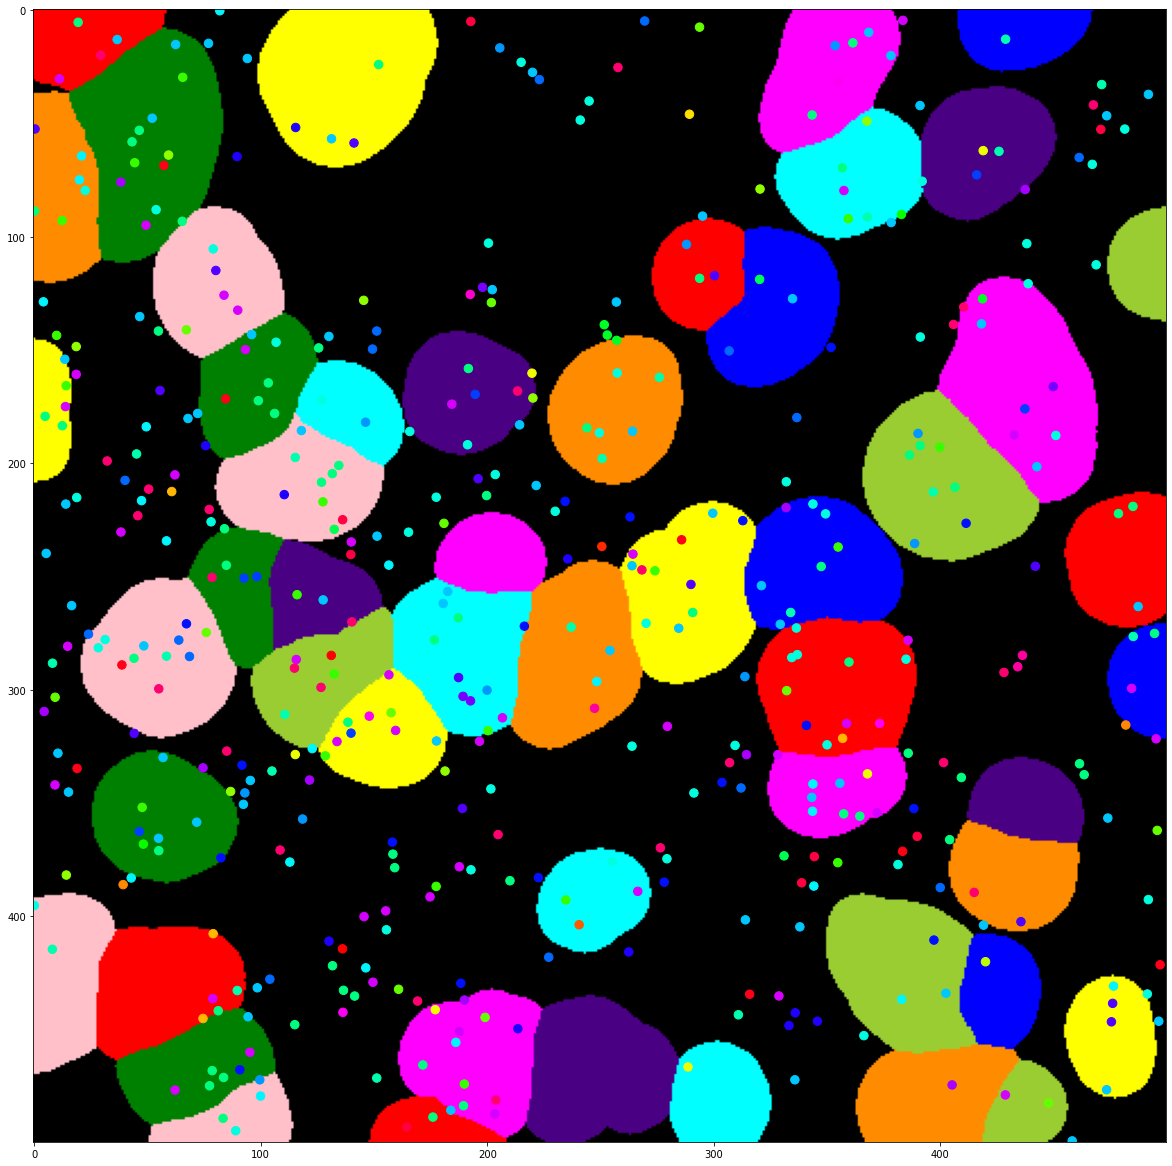

In [18]:
plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
imgplot = plt.imshow(rgb_label_image)
plt.scatter(spots.x, spots.y, s=my_dpi, c=spots.Gene.astype('category').cat.codes,cmap='hsv')
plt.show()

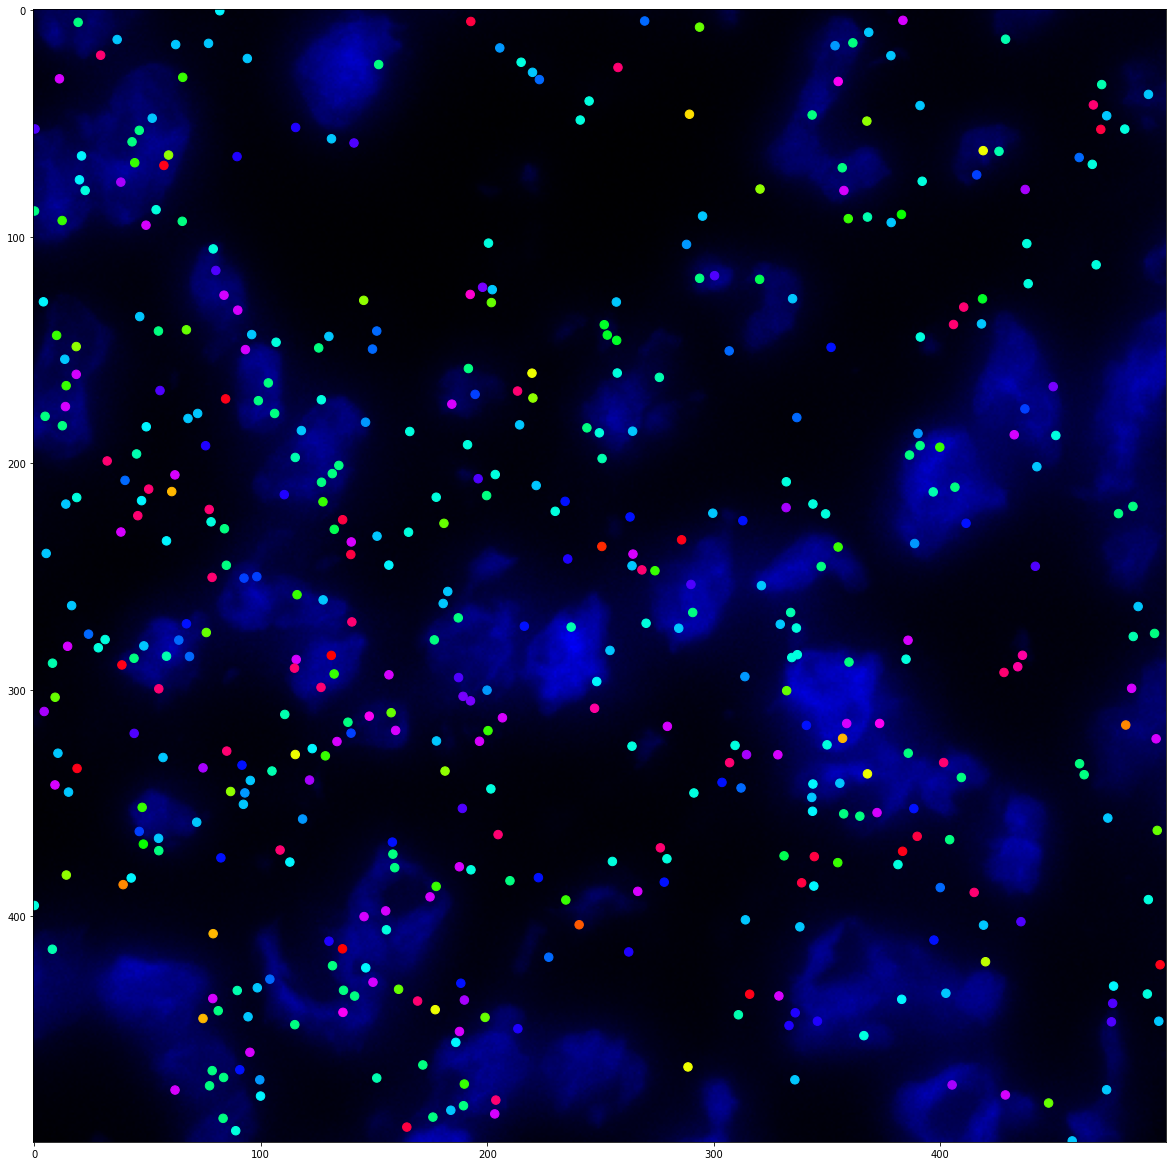

In [34]:
im = tifffile.imread('/mnt/d/hmgu/data/test/raw_image.tif')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["black","blue"])
plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
plt.imshow(im, cmap=cmap)
plt.scatter(spots.x, spots.y, s=my_dpi, c=spots.Gene.astype('category').cat.codes,cmap='hsv')
plt.show()